In [99]:
from bs4 import BeautifulSoup
from  requests import Session
import pandas as pd
import csv

In [16]:
url = 'https://la3eb.com/ar-sa'

In [17]:
session = Session()
response = session.get(url)

In [185]:
soup = BeautifulSoup(response.text)

'<!DOCTYPE html>\n<html dir="rtl" lang="ar">\n <head>\n  <script async="" crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-7513230669656003">\n  </script>\n  <link href="https://api.la3eb.com" rel="preconnect"/>\n  <link href="https://www.google-analytics.com" rel="preconnect"/>\n  <link href="https://www.googletagmanager.com" rel="preconnect"/>\n  <link href="https://fonts.googleapis.com" rel="preconnect"/>\n  <link href="https://fonts.gstatic.com" rel="preconnect"/>\n  <link href="https://dev.visualwebsiteoptimizer.com" rel="preconnect"/>\n  <link href="https://www.facebook.com" rel="preconnect"/>\n  <link href="https://connect.facebook.net" rel="preconnect"/>\n  <link href="https://api.stream-io-api.com" rel="preconnect"/>\n  <link href="https://api.la3eb.com" rel="dns-prefetch"/>\n  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>\n  <link href="https://www.googletagmanager.com" rel="dns-prefetch"/>\n  <link
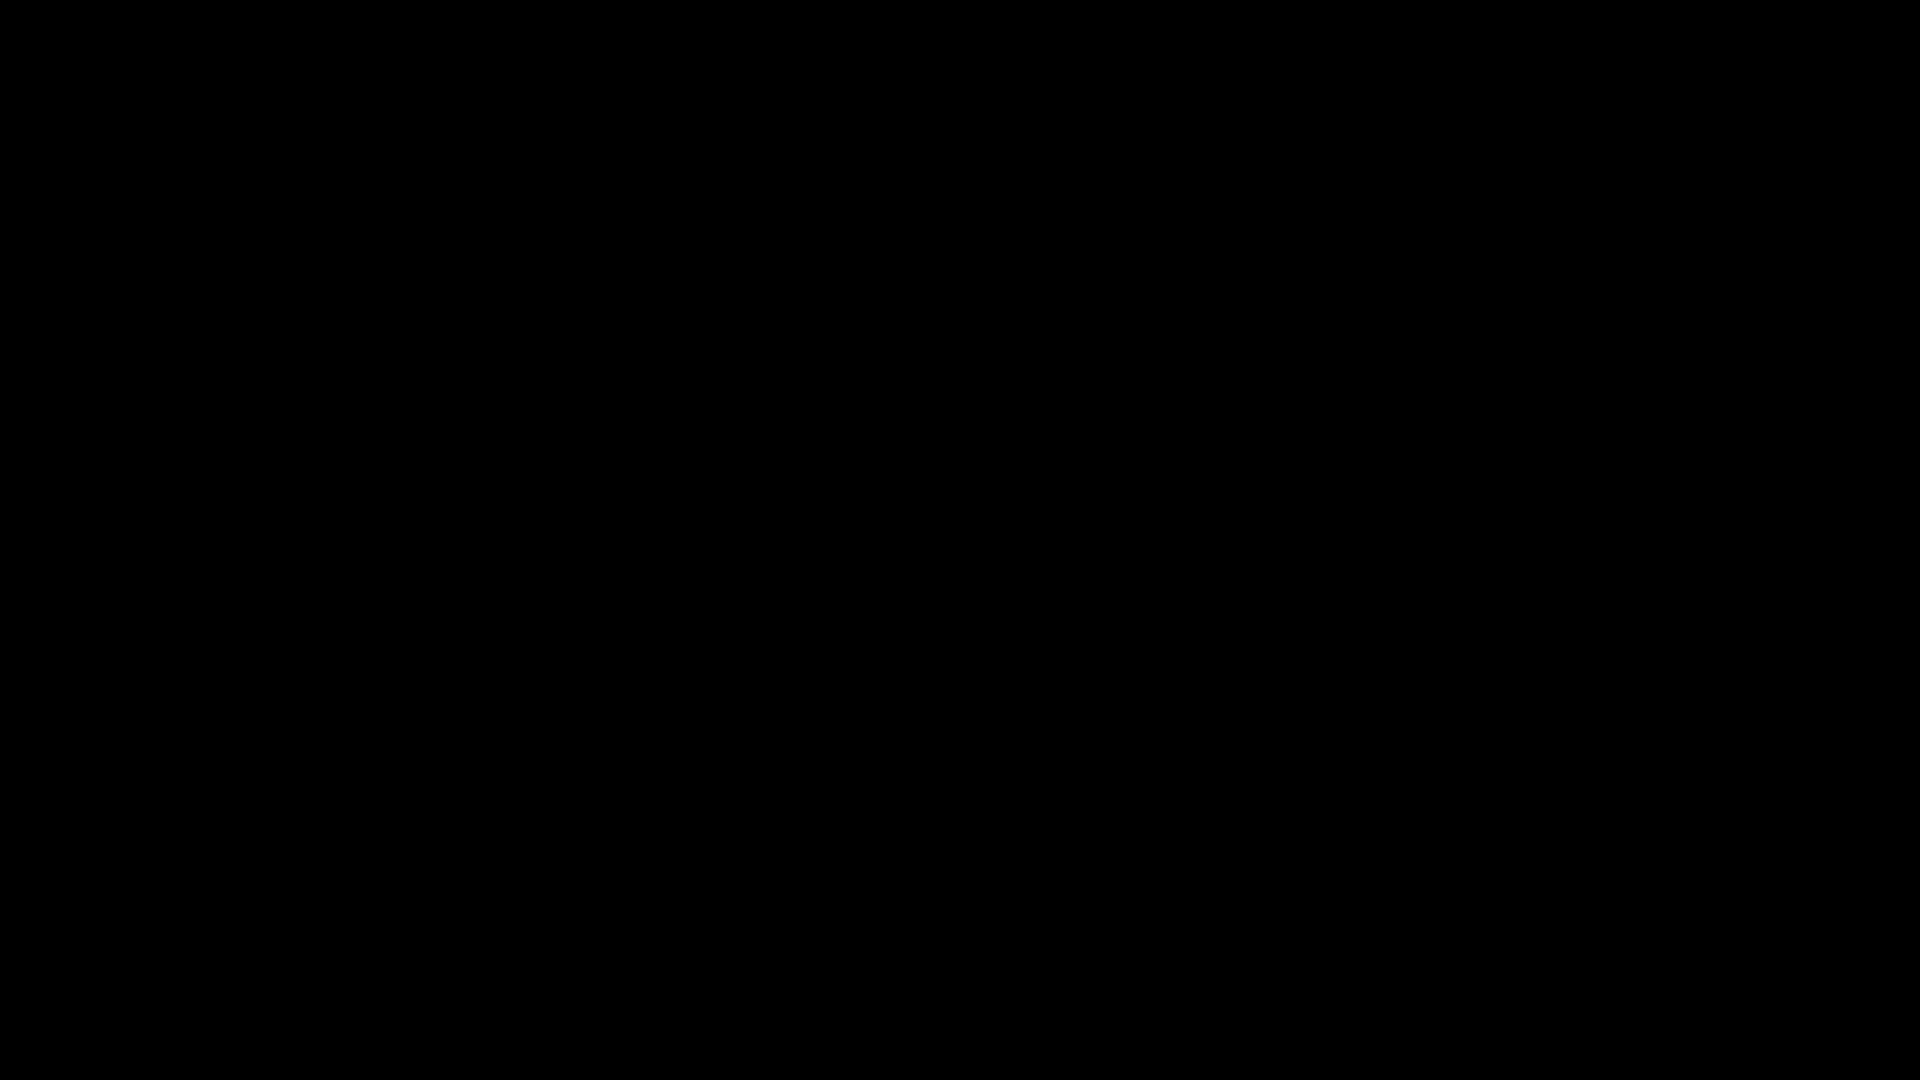
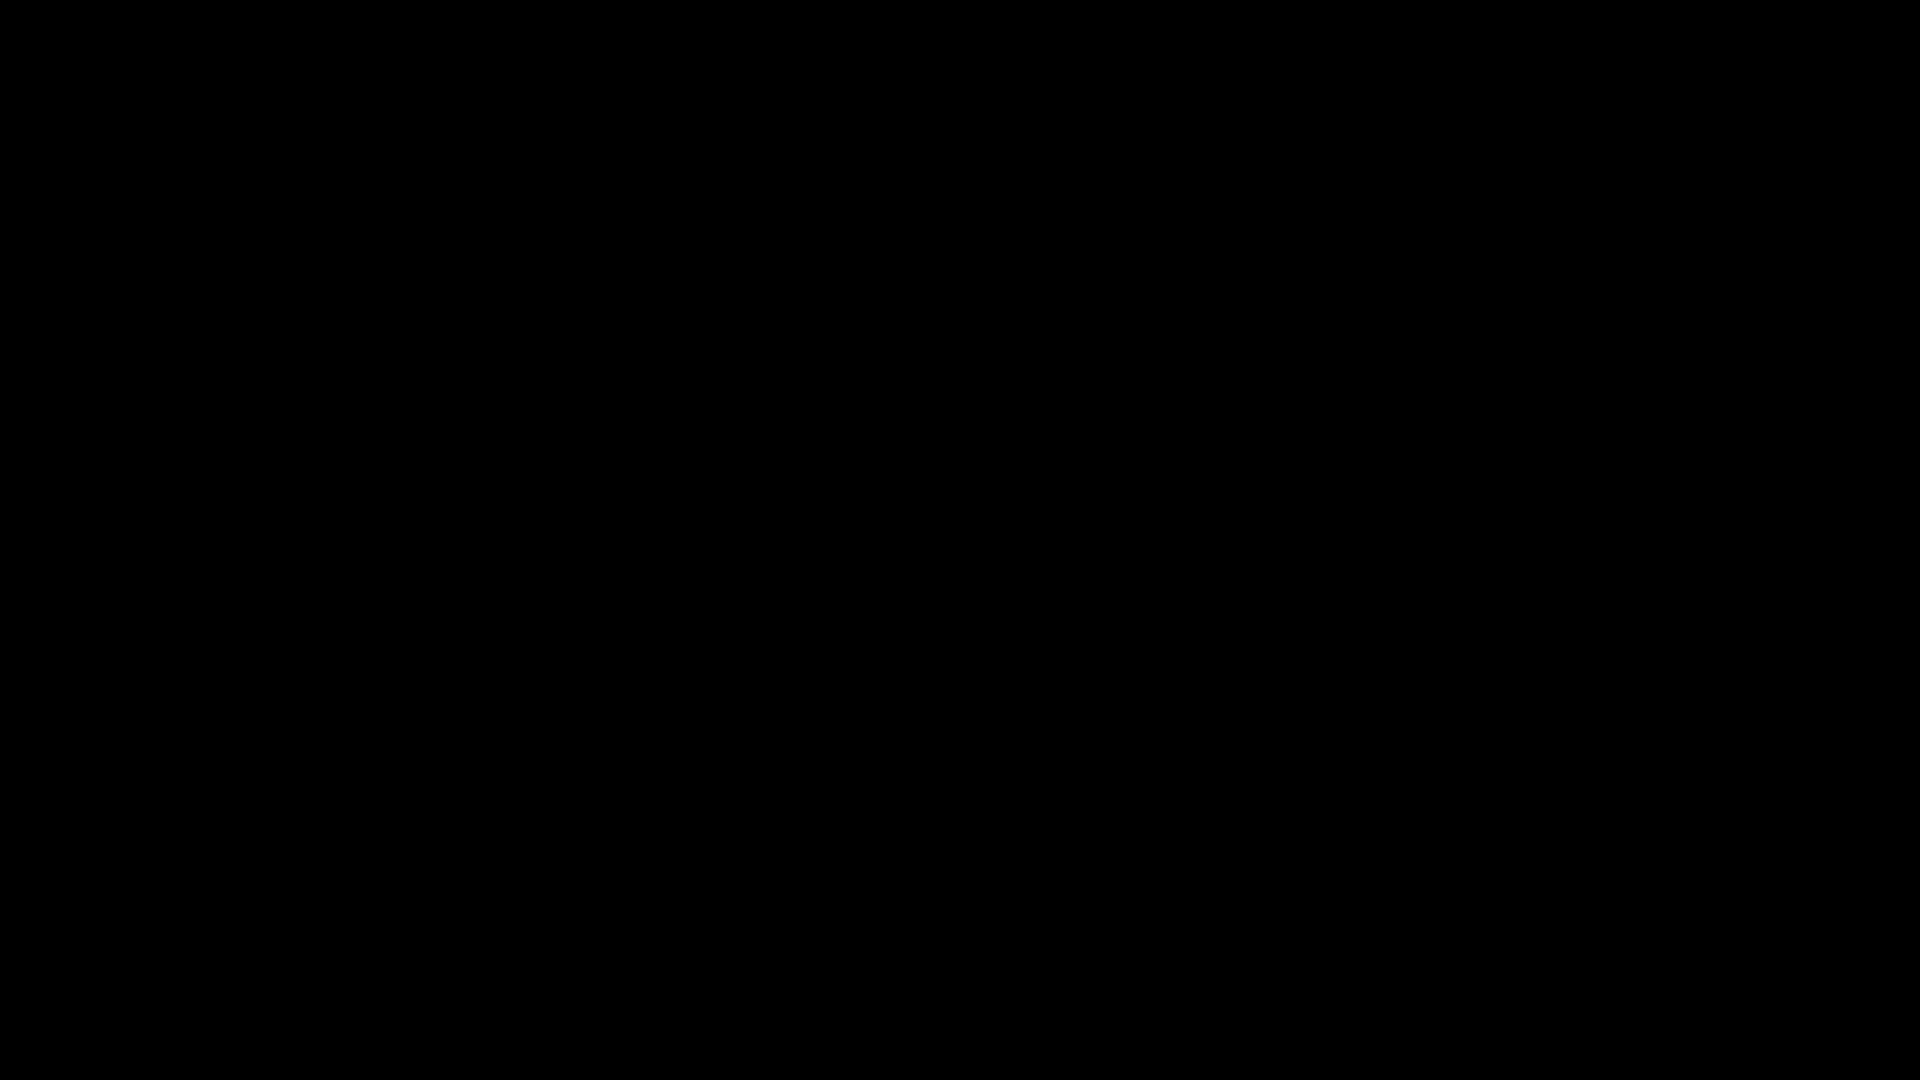
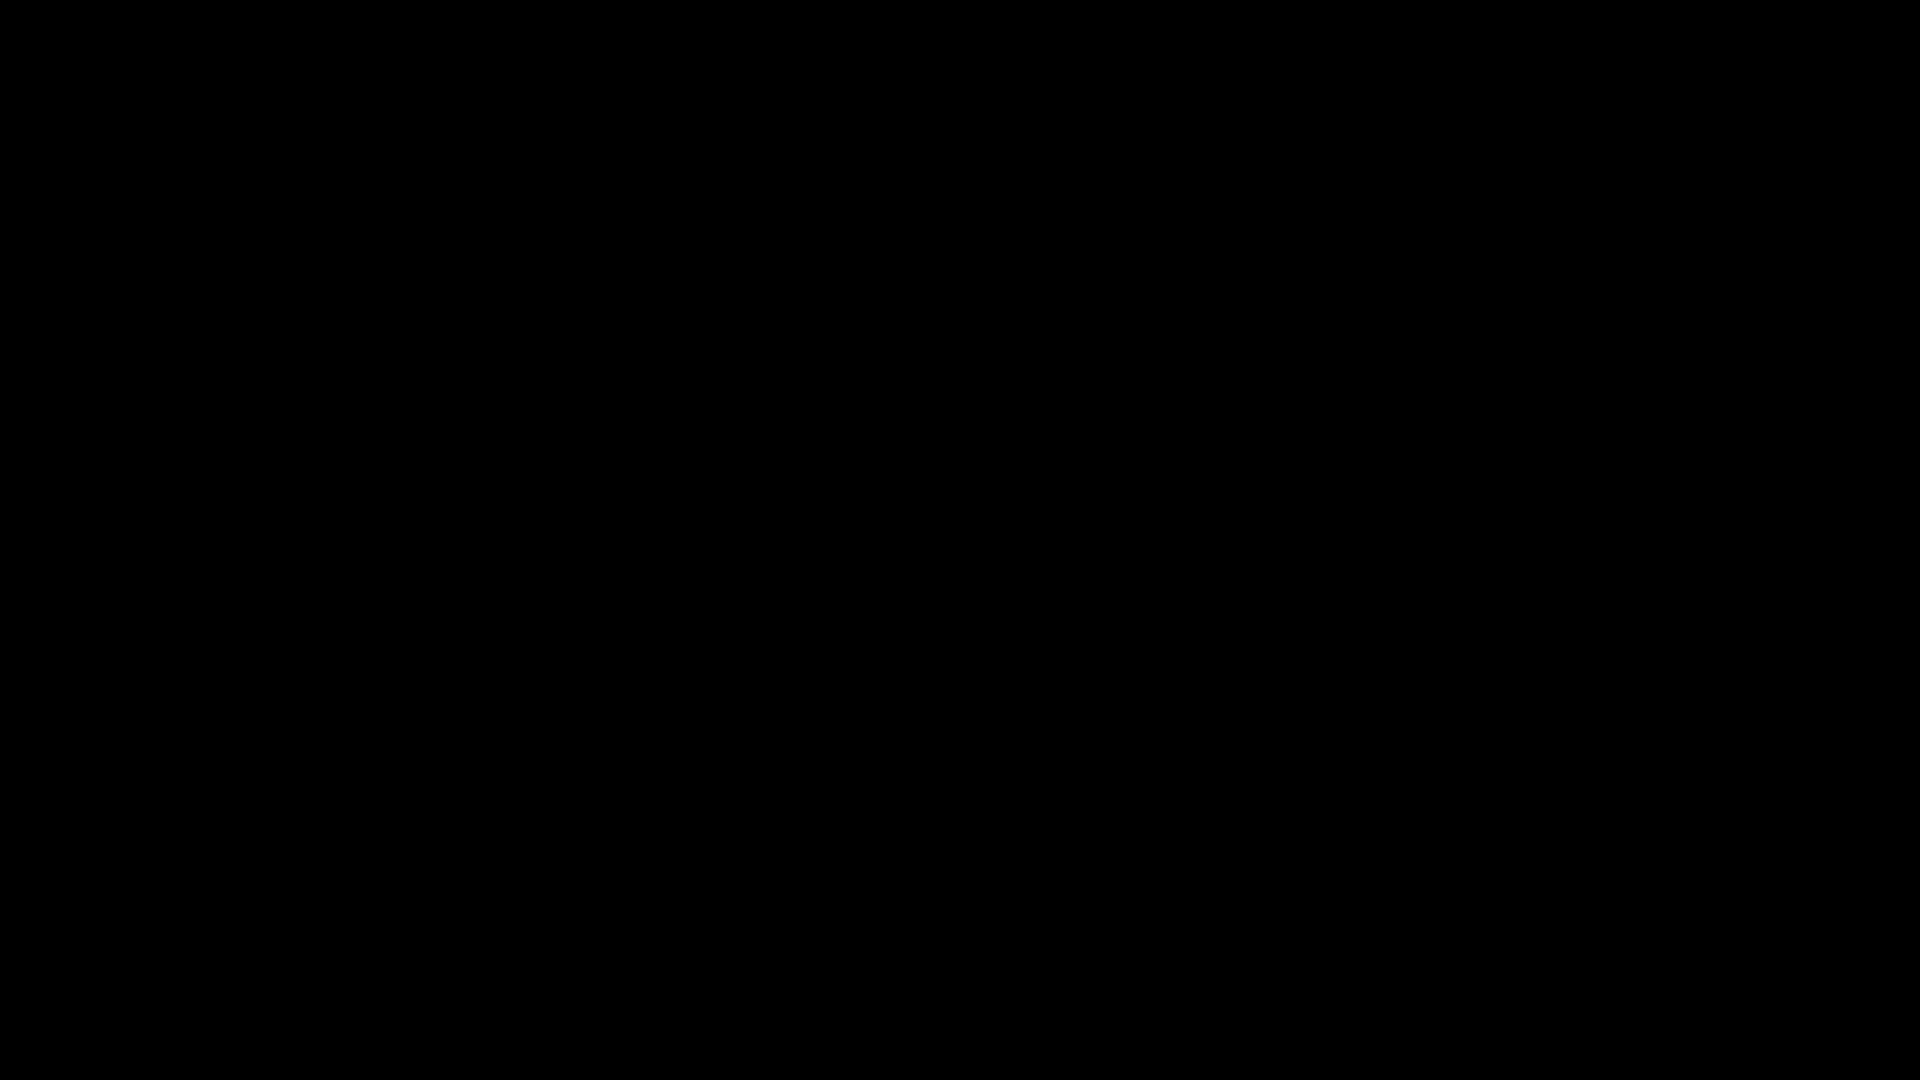
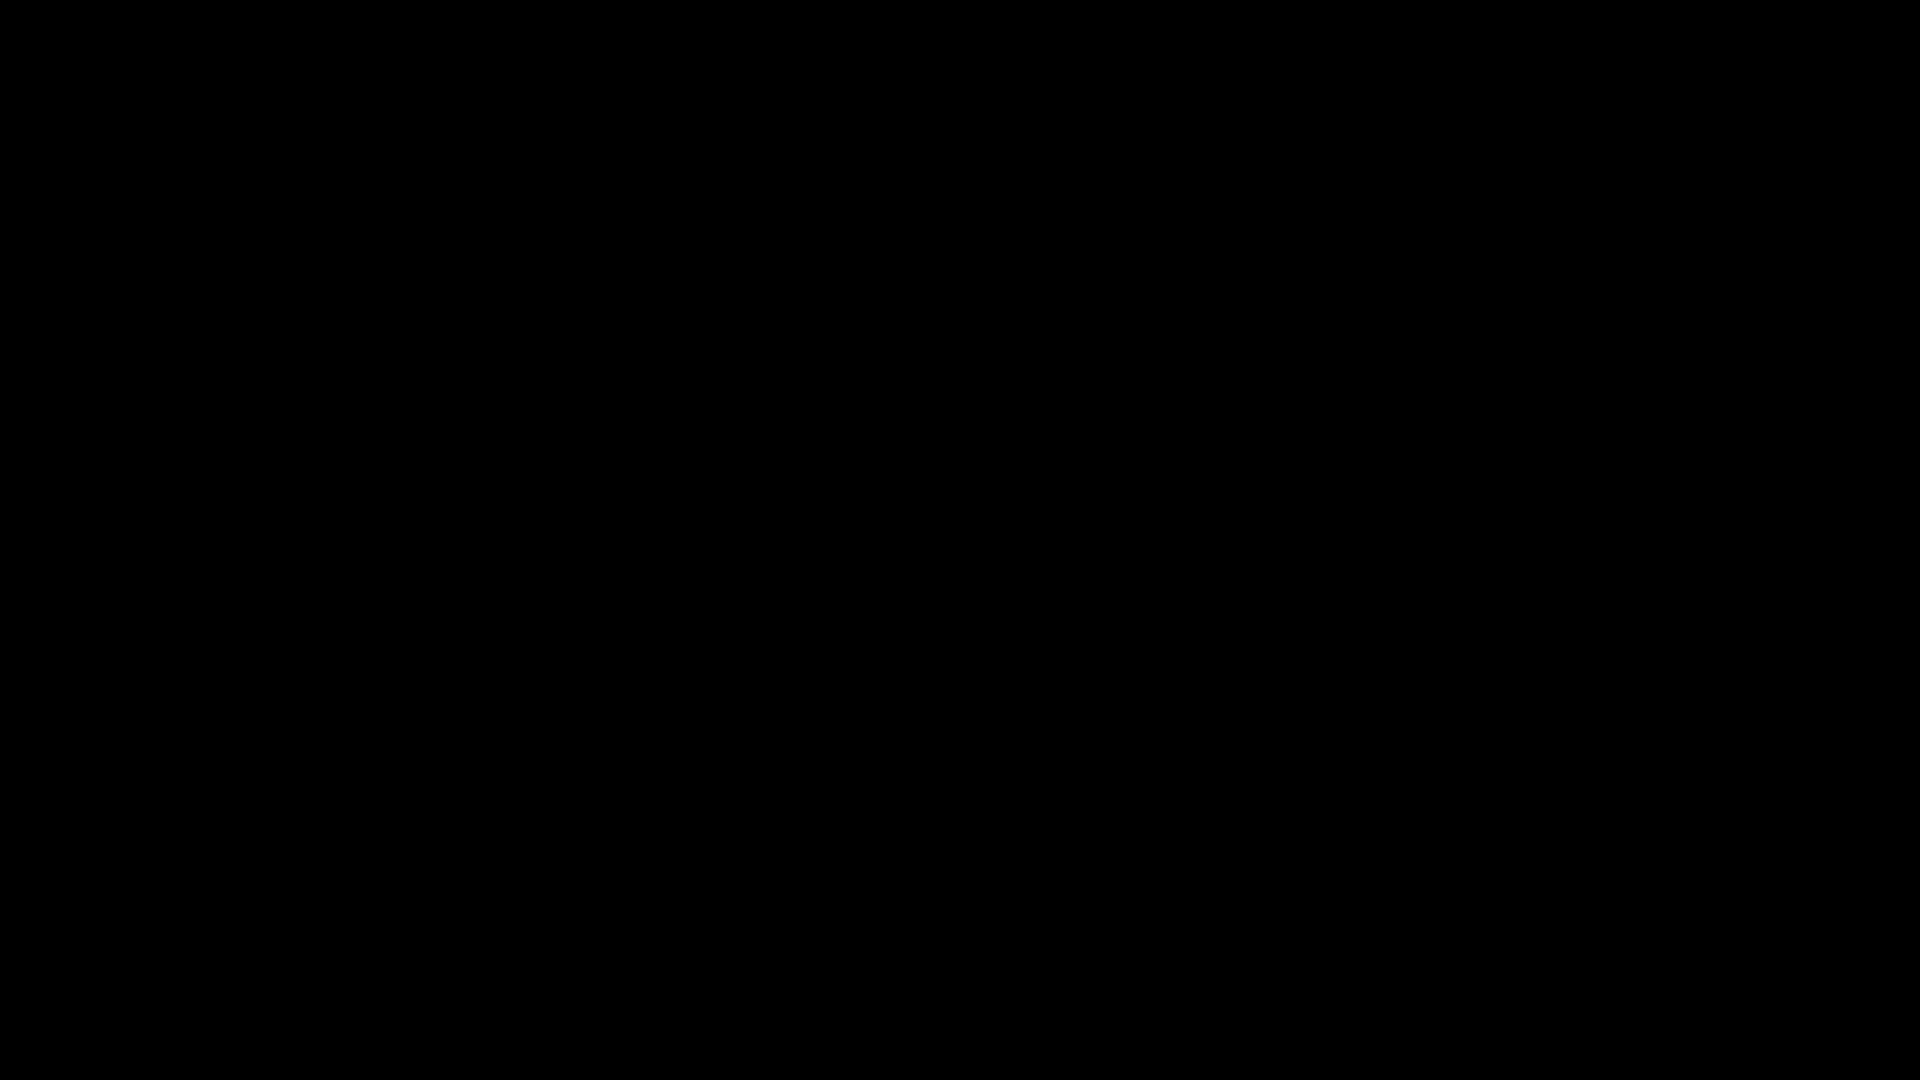
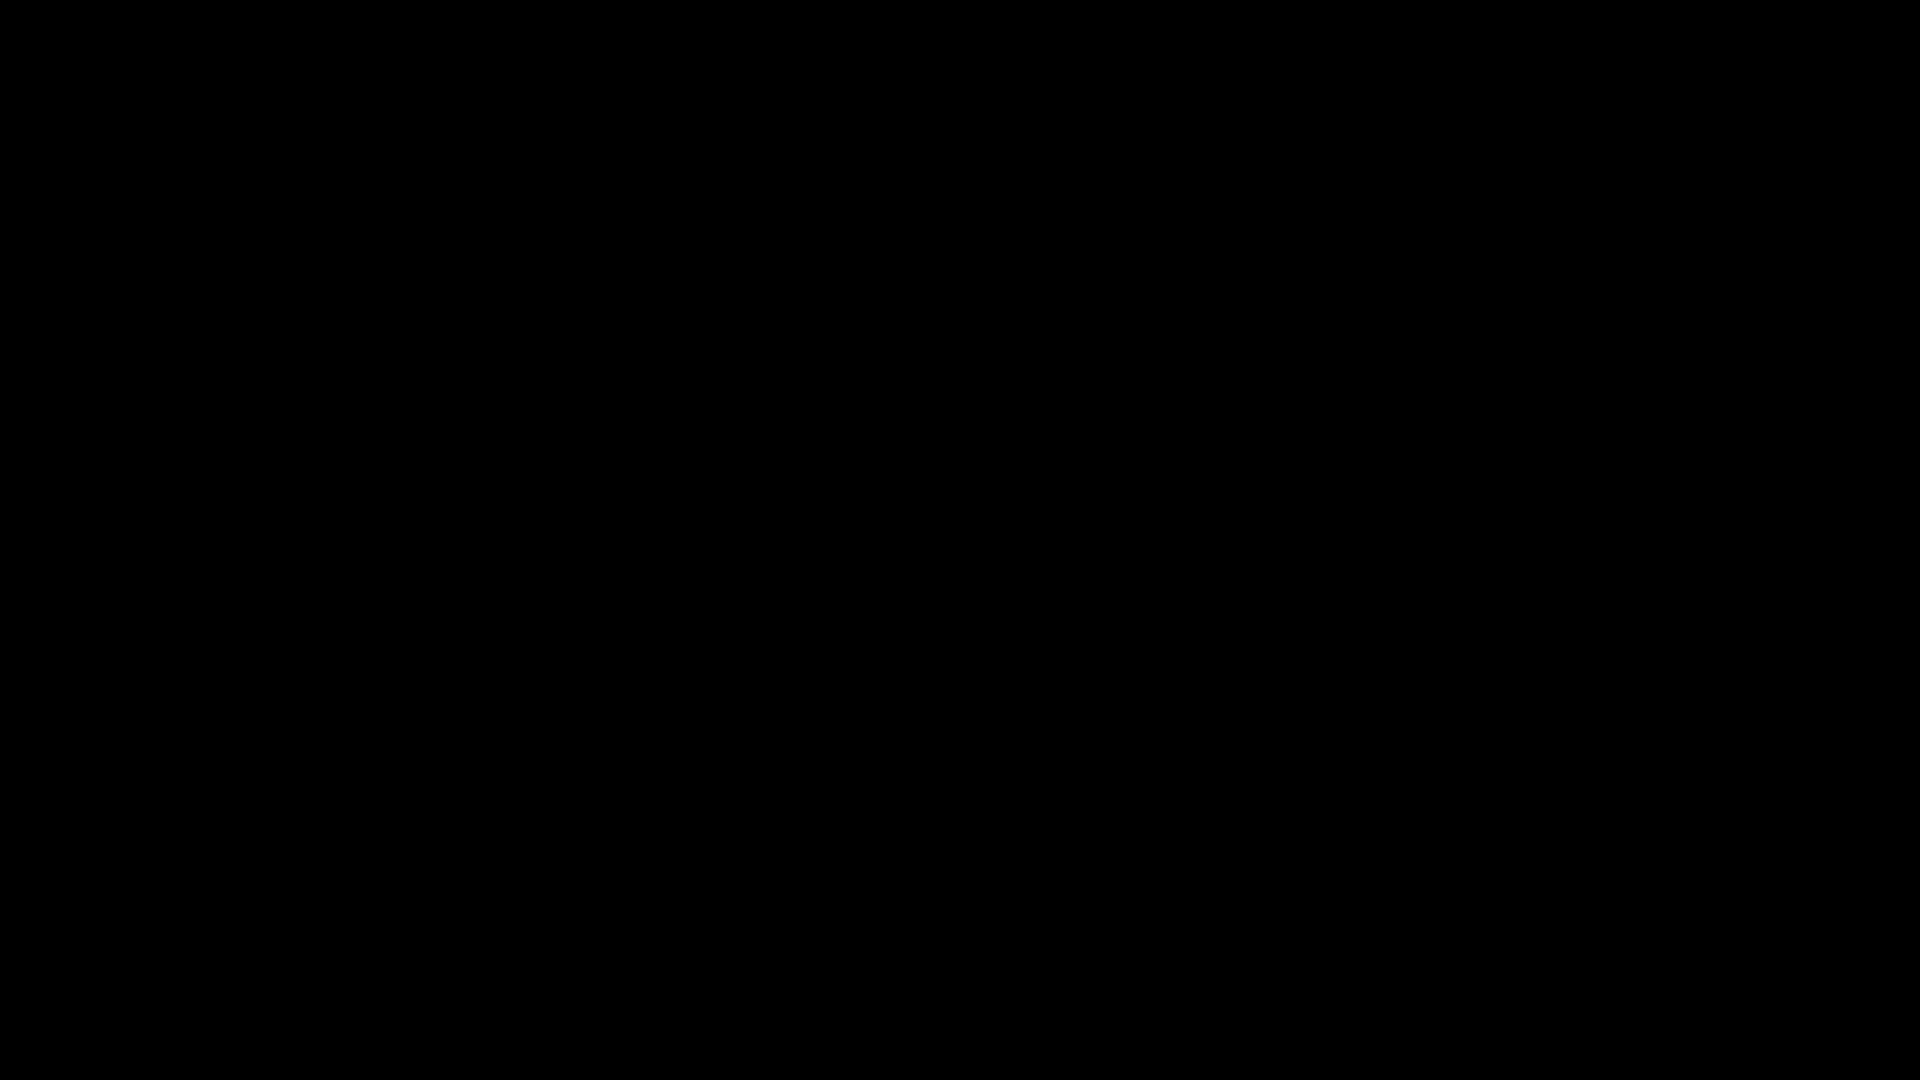
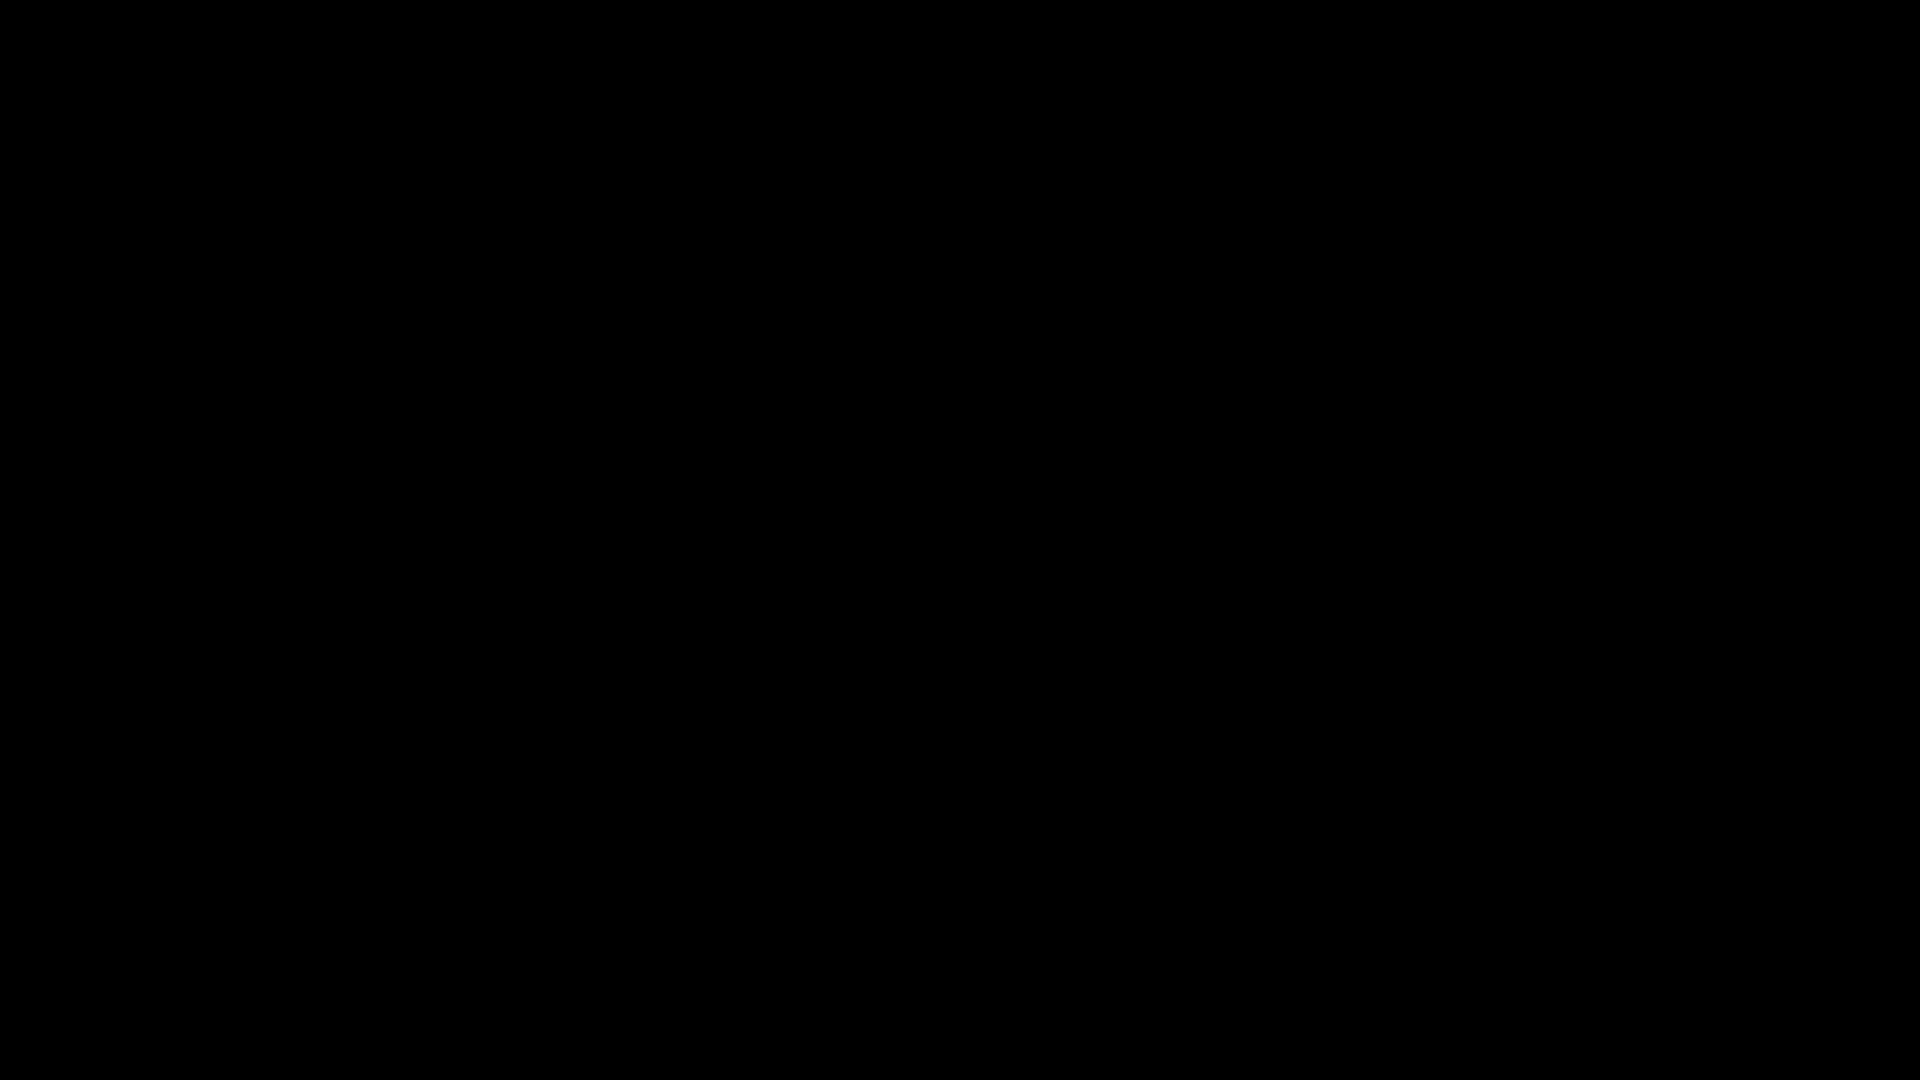
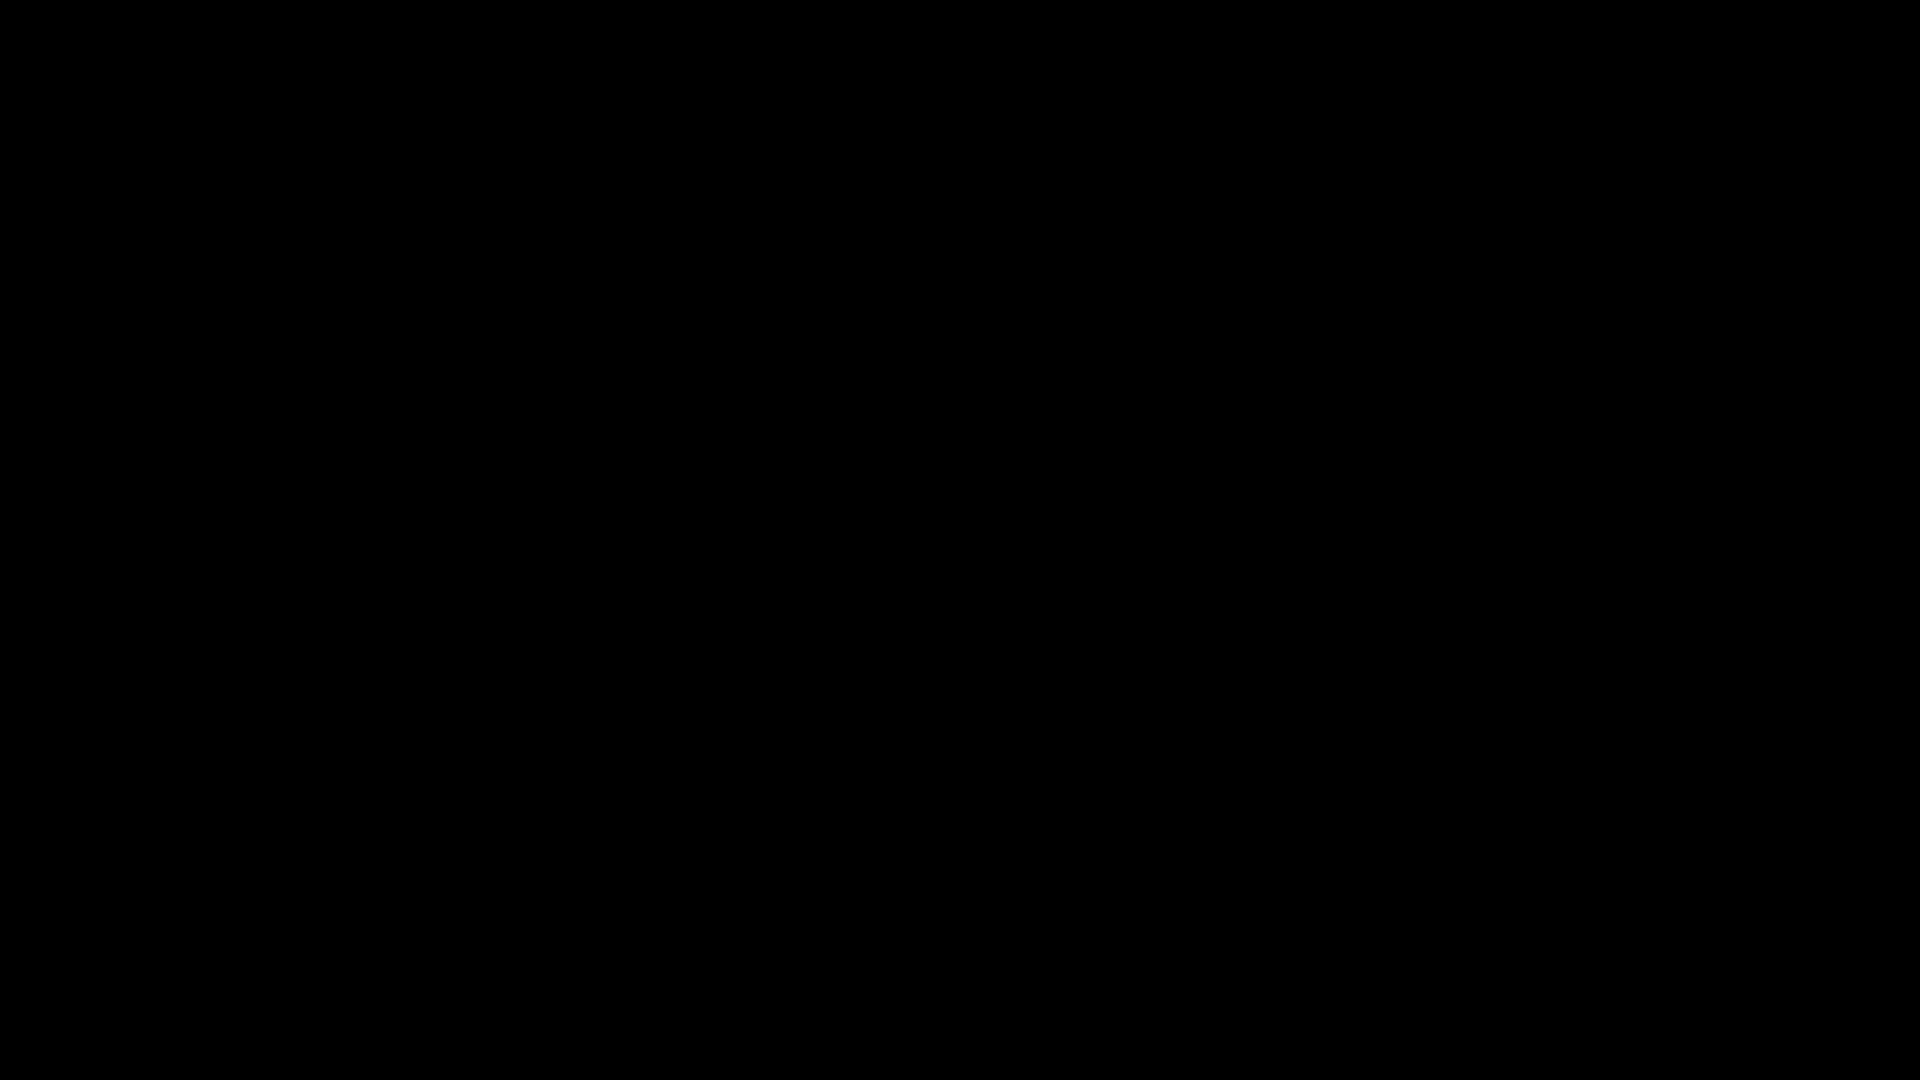

In [186]:
soup.prettify()

In [187]:
soup.title

<title>لاعب | مكان الألعاب الأسرع نموًا في العالم العربي.</title>

In [188]:
products = soup.find_all(attrs={'class':'ProductCard_cardWrapper__1hdgC'})

In [189]:
products[0]

<div class="ProductCard_cardWrapper__1hdgC"><div class="ProductCard_productCardLite__3DeVJ"><div class="ProductCard_picPlaceholder__3c0ID"></div><div class="ProductCard_textContainer__27V5n"><div class="ProductCard_name__2lvqP">PlayStation 5 Blu-ray with Sony A80J 55 inch Smart TV | CORSAIR HS35 Headset and GAMEON Cooler</div><div class="ProductCard_pricing__1vzVW">8395.00 ر.س</div><button class="btn btn-primary OrderButton_orderButton__20BSJ">أضف إلى سلتك</button></div></div></div>

In [190]:
for product in products:
    products_name = product.find(attrs={'class':'ProductCard_name__2lvqP'})
    print(products_name)

<div class="ProductCard_name__2lvqP">PlayStation 5 Blu-ray with Sony A80J 55 inch Smart TV | CORSAIR HS35 Headset and GAMEON Cooler</div>
<div class="ProductCard_name__2lvqP">PlayStation 5 Blu-ray with God of War Ragnarok Game Voucher PS5 and DualSense Wireless Controller GOW Special Edition</div>
<div class="ProductCard_name__2lvqP">بلايستيشن 5 مع قسيمة لعبة جاد اوف وور راجناروك</div>
<div class="ProductCard_name__2lvqP">حزمة لعبة هورايزن نداء الجبل على PlayStation VR2</div>
<div class="ProductCard_name__2lvqP">PlayStation VR2</div>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<div class="ProductCard_name__2lvqP">سوني X80K تلفزيون ذكي 55 بوصة (HDR) نطاق ديناميكي عالي 4K وضوح عال وفائق (Google TV)</div>
<div class="ProductCard_name__2lvqP">تلفزيون سوني 4k | X80J | سمارت 55 بوصة</div>
<div class="ProductCard_name__2lvqP">شاشة ذكية سوني X85X - مقاس 55 بوصة - برافيا - فل اضاءة ليد - 4K الترا اتش دي - يدعم النطاق الديناميكي العالي - جوجل تي في</div>
<div class

In [191]:
for product in products:
    products_name = product.find(attrs={'class':'ProductCard_name__2lvqP'})
    product_price = product.find(attrs={'class':'ProductCard_pricing__1vzVW'})
    if products_name is not None and product_price is not None:
        print(products_name.text,":===>",product_price.text)

PlayStation 5 Blu-ray with Sony A80J 55 inch Smart TV | CORSAIR HS35 Headset and GAMEON Cooler :===> 8395.00 ر.س
PlayStation 5 Blu-ray with God of War Ragnarok Game Voucher PS5 and DualSense Wireless Controller GOW Special Edition :===> 3128.00 ر.س
بلايستيشن 5 مع قسيمة لعبة جاد اوف وور راجناروك :===> 2799.00 ر.س
حزمة لعبة هورايزن نداء الجبل على PlayStation VR2 :===> 2699.00 ر.س
PlayStation VR2 :===> 2499.00 ر.س
سوني X80K تلفزيون ذكي 55 بوصة (HDR) نطاق ديناميكي عالي 4K وضوح عال وفائق (Google TV) :===> 3399.00 ر.س
تلفزيون سوني 4k | X80J | سمارت 55 بوصة :===> 3699.00 ر.س
شاشة ذكية سوني X85X - مقاس 55 بوصة - برافيا - فل اضاءة ليد - 4K الترا اتش دي - يدعم النطاق الديناميكي العالي - جوجل تي في :===> 3999.00 ر.س
تلفزيون سوني X80J | متوافق مع PS5 | سمارت 65 بوصة | 4 :===> 4699.00 ر.س
شاشة ذكية سوني X90X - مقاس 55 بوصة - برافيا اكس ار - فل اضاءة ليد - 4K الترا اتش دي - يدعم النطاق الديناميكي العالي - مع سماعات رأس سلكية سوني انزون H3 :===> 4767.99 ر.س
اكس بوكس سلسلة اس نسخة الديجيتال 512 جيجابا

In [192]:
with open('C:/USERS/ABDO/Desktop/laeb_data.csv','w',encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(('Product','Price'))
    for product in products:
        products_name = product.find(attrs={'class':'ProductCard_name__2lvqP'})
        product_price = product.find(attrs={'class':'ProductCard_pricing__1vzVW'})
        if products_name is not None and product_price is not None:
            writer.writerow((products_name.text,product_price.text))

In [193]:
df = pd.read_csv('C:/Users/ABDO/Desktop/laeb_data.csv')
df.head()

,Product,Price
0,PlayStation 5 Blu-ray with Sony A80J 55 inch S...,8395.00 ر.س
1,PlayStation 5 Blu-ray with God of War Ragnarok...,3128.00 ر.س
2,بلايستيشن 5 مع قسيمة لعبة جاد اوف وور راجناروك,2799.00 ر.س
3,حزمة لعبة هورايزن نداء الجبل على PlayStation VR2,2699.00 ر.س
4,PlayStation VR2,2499.00 ر.س


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
Product    75 non-null object
Price      70 non-null object
dtypes: object(2)
memory usage: 664.0+ bytes


In [195]:
df.describe()

,Product,Price
count,75,70
unique,68,57
top,سماعة قيمنق مارفو سكوربيون HG8901,184.00 ر.س
freq,2,4


## Cleaning the prices


In [197]:
df['Price']= [str(x).split()[0] for x in df['Price']]

In [198]:
df.head()

,Product,Price
0,PlayStation 5 Blu-ray with Sony A80J 55 inch S...,8395.00
1,PlayStation 5 Blu-ray with God of War Ragnarok...,3128.00
2,بلايستيشن 5 مع قسيمة لعبة جاد اوف وور راجناروك,2799.00
3,حزمة لعبة هورايزن نداء الجبل على PlayStation VR2,2699.00
4,PlayStation VR2,2499.00


### Saving the modified_dataFrame

In [199]:
df.to_csv('C:/Users/ABDO/Desktop/laeb_data_modified2022-12-4.csv',index=False)

In [213]:
df_modified = pd.read_csv('C:/Users/ABDO/Desktop/laeb_data_modified2022-12-4.csv')
df_modified.head()

,Product,Price
0,PlayStation 5 Blu-ray with Sony A80J 55 inch S...,8395.0
1,PlayStation 5 Blu-ray with God of War Ragnarok...,3128.0
2,بلايستيشن 5 مع قسيمة لعبة جاد اوف وور راجناروك,2799.0
3,حزمة لعبة هورايزن نداء الجبل على PlayStation VR2,2699.0
4,PlayStation VR2,2499.0


## search for nulls

In [216]:
df_modified.isna().sum()

Product    0
Price      5
dtype: int64

In [226]:
df_modified.dropna(inplace=True)

In [227]:
df_modified.isna().sum()

Product    0
Price      0
dtype: int64

In [228]:
df_modified.head()

,Product,Price
0,PlayStation 5 Blu-ray with Sony A80J 55 inch S...,8395.0
1,PlayStation 5 Blu-ray with God of War Ragnarok...,3128.0
2,بلايستيشن 5 مع قسيمة لعبة جاد اوف وور راجناروك,2799.0
3,حزمة لعبة هورايزن نداء الجبل على PlayStation VR2,2699.0
4,PlayStation VR2,2499.0


In [229]:
df_modified.describe()

,Price
count,70.000000
mean,3153.900143
std,2597.407353
min,99.000000
25%,1196.750000
50%,2699.000000
75%,4697.250000
max,10680.000000
